### Background & Context

Airbnb is an online platform that allows people to rent short term accommodation. This ranges from regular people with a spare bedroom to property management firms who lease multiple rentals. On the one side, Airbnb enables owners to list their space and earn rental money. On the other side, it provides travelers easy access to renting private homes.

Airbnb receives commissions from two sources upon every booking, namely from the hosts and guests. For every booking, Airbnb charges the guest 6-12% of the booking fee. Moreover, Airbnb charges the host 3% for every successful transaction.

As a senior data scientist at Airbnb, you have to come up with a pricing model that can effectively predict the Rent for an accommodation and can help hosts, travelers, and also the business in devising profitable strategies.

 

### Objective

Explore and visualize the dataset.

Build a linear regression model to predict the log of rental price

Generate a set of insights and recommendations that will help the business.

### Data Dictionary 
- id - Property ID
- room_type - Type of Room in the property
- accommodates - How many adults can this property accomodates
- bathrooms- Number of bathrooms in the property
- cancellation_policy-Cancellation policy of the property
- cleaning_fee-This denotes whether property cleaning fee is included in the rent or not
- instant_bookable-It indicates whether instant booking facility is available or not
- review_scores_rating-Review rating score of the property
- bedrooms-Number of bedrooms in the property
- beds-Total number of beds in the property
- log_price-Log of rental price of the property for a fixed period 

## Loading Libraries

#### and loading the data

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")


import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
# To enable plotting graphs in Jupyter notebook
%matplotlib inline
sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

airbnb = pd.read_csv("AirBNB.csv", engine="python")

# checking the shape of the data
print(f"There are {airbnb.shape[0]} rows and {airbnb.shape[1]} columns.")  # f-string


There are 74111 rows and 11 columns.


<IPython.core.display.Javascript object>

In [2]:
# making a copy of the dataset to avoid unexpected changes to the original data

df = airbnb.copy()

<IPython.core.display.Javascript object>

#### Viewing a sample of the data

In [3]:
df.sample(5)

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
39142,16352783,Private room,2.0,1.5,moderate,True,t,100.0,1.0,1.0,4.553877
60635,16779165,Private room,2.0,1.0,strict,True,f,80.0,1.0,1.0,4.553877
73297,15913550,Entire home/apt,2.0,1.0,strict,True,t,97.0,1.0,1.0,4.976734
71558,7176158,Entire home/apt,6.0,1.0,flexible,True,f,99.0,2.0,4.0,4.110874
16038,16823923,Private room,1.0,2.0,flexible,False,f,NaN,1.0,1.0,4.828314


<IPython.core.display.Javascript object>

#### Initial observations

- The data is comsprised of string and integer/float data types.
- There are also some NaN data entries.
more info is available below


## EDA

### Checking the data types of columns in the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    74111 non-null  int64  
 1   room_type             74106 non-null  object 
 2   accommodates          74108 non-null  float64
 3   bathrooms             73908 non-null  float64
 4   cancellation_policy   74103 non-null  object 
 5   cleaning_fee          74107 non-null  object 
 6   instant_bookable      74111 non-null  object 
 7   review_scores_rating  57389 non-null  float64
 8   bedrooms              74019 non-null  float64
 9   beds                  73980 non-null  float64
 10  log_price             74111 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 6.2+ MB


<IPython.core.display.Javascript object>

- One notices that some columns such as room_type, accomodates,bathrooms etc all have some missing values apart from id, instant_bookable and log_price
- room_type, cancellation policy, cleaning fee and instant bookable are categorical variables and the rest are numerical variables.
- column names are uniform in font and special characters.

**Checking number of missing values in the columns**

In [5]:
df.isnull().sum()

id                          0
room_type                   5
accommodates                3
bathrooms                 203
cancellation_policy         8
cleaning_fee                4
instant_bookable            0
review_scores_rating    16722
bedrooms                   92
beds                      131
log_price                   0
dtype: int64

<IPython.core.display.Javascript object>

- review_scores_rating has the most missing values with 16722 values missing, while accommodates has the least missing values with 3 values missing.


### Summary of the dataset

In [6]:
df.describe()  # gives a summary of the numerical values

,id,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price
count,7.411100e+04,74108.000000,73908.000000,57389.000000,74019.000000,73980.000000,74111.000000
mean,1.126662e+07,3.155125,1.235272,94.067365,1.265797,1.710868,4.782069
std,6.081735e+06,2.153603,0.582054,7.836556,0.852149,1.254142,0.717394
min,3.440000e+02,1.000000,0.000000,20.000000,0.000000,0.000000,0.000000
25%,6.261964e+06,2.000000,1.000000,92.000000,1.000000,1.000000,4.317488
50%,1.225415e+07,2.000000,1.000000,96.000000,1.000000,1.000000,4.709530
75%,1.640226e+07,4.000000,1.000000,100.000000,1.000000,2.000000,5.220356
max,2.123090e+07,16.000000,8.000000,100.000000,10.000000,18.000000,7.600402


<IPython.core.display.Javascript object>

- accommodates has mean of ~3 people, and it has a maximum of accommodating 16 people. This could be indicative of an outlier.
- Bathrooms, bedrooms, and beds have a minimum of 0, which seems odd for an AirBnB, and a maximum of 8, 20, and 18 respectively. There could be outliers or some missing values which are represented as 0s in the dataset. That will have to be explored further.
- The minimum, mean, median and the maximum values of the review score ratings are also indicative of potential outliers being present in the data.
- log price also has a minimum value of 0.0, which might need to be explored further too.


**Summary of the categorical variables**

In [7]:
df.describe(include="object")

,room_type,cancellation_policy,cleaning_fee,instant_bookable
count,74106,74103,74107,74111
unique,3,3,2,2
top,Entire home/apt,strict,True,f
freq,41308,32500,54399,54660


<IPython.core.display.Javascript object>

- There are 3 different room_types, and Entire home/apt is most frequent option
- There are also 3 cancellation policy types and strict is the majority
- Cleaning fee and instant bookable have 2 types each, and True and f(false?) are the frequent options respectively.

#### Checking the different levels of the categorical variables

In [8]:
cat_column = df.describe(include="object").columns

for i in cat_column:
    print("Unique values in", i, "are :")
    print(df[i].value_counts())
    print("-" * 30)

Unique values in room_type are :
Entire home/apt    41308
Private room       30635
Shared room         2163
Name: room_type, dtype: int64
------------------------------
Unique values in cancellation_policy are :
strict      32500
flexible    22543
moderate    19060
Name: cancellation_policy, dtype: int64
------------------------------
Unique values in cleaning_fee are :
True     54399
False    19708
Name: cleaning_fee, dtype: int64
------------------------------
Unique values in instant_bookable are :
f    54660
t    19451
Name: instant_bookable, dtype: int64
------------------------------


<IPython.core.display.Javascript object>

### Univariate Analysis

In [9]:
# This function takes the numerical column as the input and returns the boxplots
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(
        feature, kde=T, ax=ax_hist2, bins=bins, color="orange"
    ) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2, color="tab:cyan"
    )  # For histogram
    ax_hist2.axvline(
        np.mean(feature), color="purple", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        np.median(feature), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

**Observation on review_scores_rating**

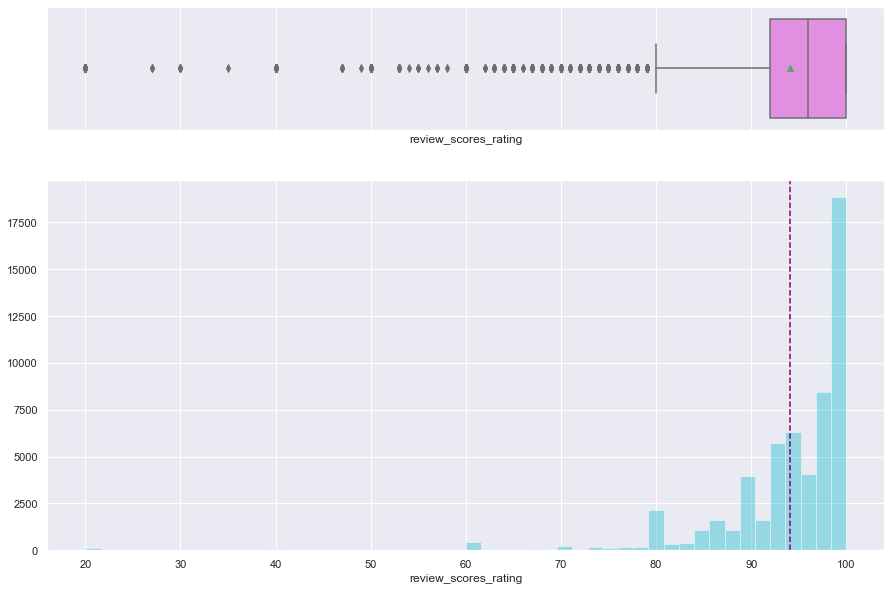

<IPython.core.display.Javascript object>

In [10]:
histogram_boxplot(df.review_scores_rating)

- The plots reveal that the the review scores rating are left-skewed. There are outliers to the left, on the lower values that can be capped, or dealt with in another manner.
- One can also see that the high review scores ratings are noticeably more.

**Observations on log_price**

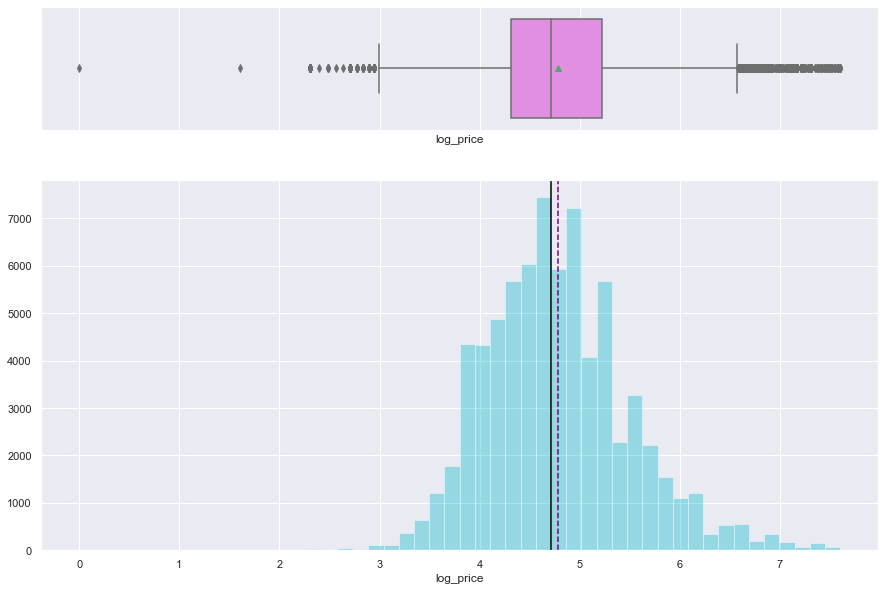

<IPython.core.display.Javascript object>

In [11]:
histogram_boxplot(df.log_price)

- log_price has a slight skew to the right. 
- The boxplot also reveals that there are outliers to the right and left, which can be capped

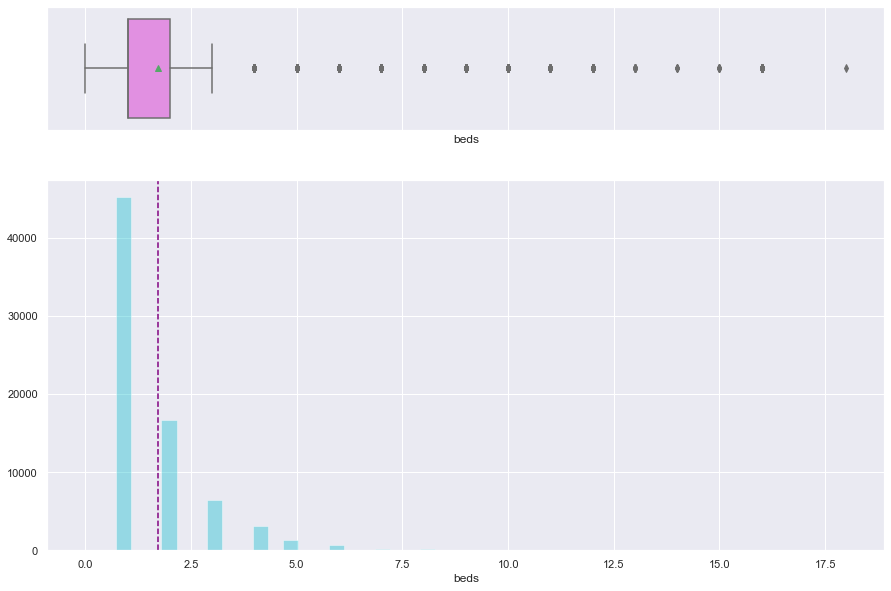

<IPython.core.display.Javascript object>

In [12]:
histogram_boxplot(df.beds)

- beds are right-skewed.
- There are also outliers to the right(top) too

In [13]:
# Function to create barplots that indicate percentage for each category.


def perc_on_bar(data, z):
    """
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    """

    total = len(data[z])  # length of the column
    plt.figure(figsize=(10, 5))
    # plt.xticks(rotation=45)
    ax = sns.countplot(data[z], palette="Paired")
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05  # width of the plot
        y = p.get_y() + p.get_height()  # hieght of the plot

        ax.annotate(percentage, (x, y), size=12)  # annotate the percantage
    plt.show()  # show the plot

<IPython.core.display.Javascript object>

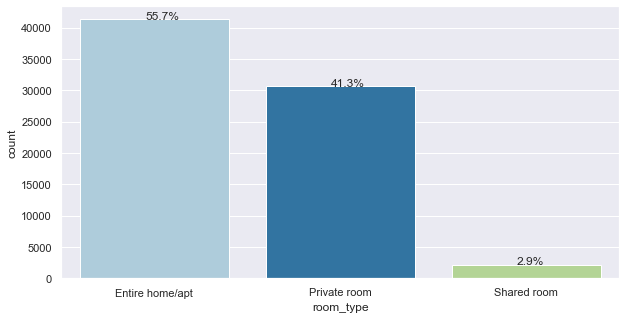

<IPython.core.display.Javascript object>

In [14]:
perc_on_bar(df, "room_type")

- With ~56% of the choices, Entire home/apt are the popular AirBnB options, followed by Private room at ~41%, then finally Shared room at ~3%

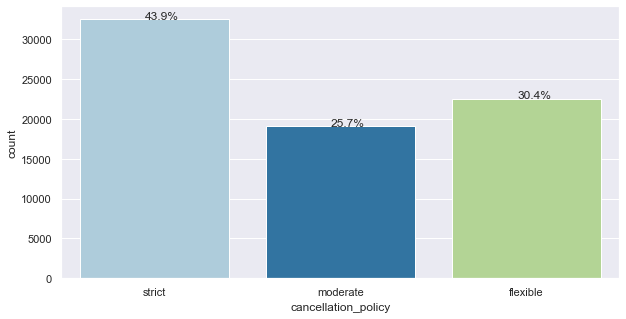

<IPython.core.display.Javascript object>

In [15]:
perc_on_bar(df, "cancellation_policy")

- Most of the AirBnBs have a strict cancellation policy with ~44%, flexible cancellation policy is at ~30% and moderate cancellation policy is at ~26%

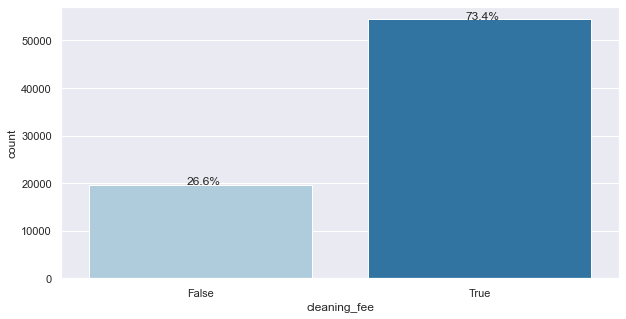

<IPython.core.display.Javascript object>

In [16]:
perc_on_bar(df, "cleaning_fee")

- The plot indicates that there is a cleaning fee associated with the AirBnBs ~73% of the time. At ~27%, there is no cleaning fee associated with the rental.

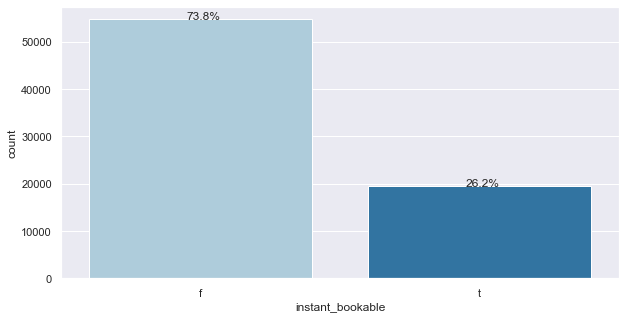

<IPython.core.display.Javascript object>

In [17]:
perc_on_bar(df, "instant_bookable")

- The plot indicates that ~74% of the available rentals do not accept instant booking. However, ~26% of the rentals are available for instant booking.


### Bivariate Analysis

#### Beds vs Room type

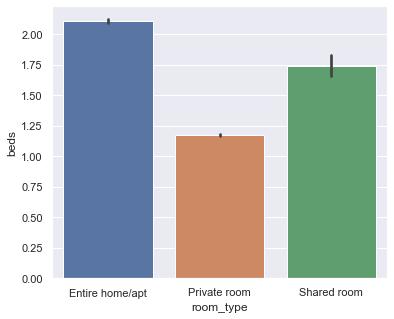

<IPython.core.display.Javascript object>

In [18]:
plt.figure(figsize=(6, 5))

sns.barplot(data=df, y="beds", x="room_type")

plt.show()

- As one would most likely assume, there are more beds available when one rents the entire home or apartment.
- The graph also shows that there are more beds available in shared rooms that private rooms.

#### room_type vs bathrooms

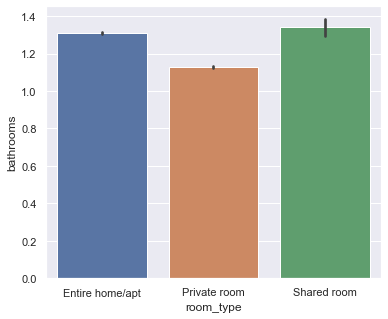

<IPython.core.display.Javascript object>

In [19]:
plt.figure(figsize=(6, 5))

sns.barplot(data=df, y="bathrooms", x="room_type")

plt.show()

- There are slightly more bathrooms available with shared rooms than entire homes/apartments. Private rooms have the least number of bathrooms.

#### Cancellation_policy vs bedrooms


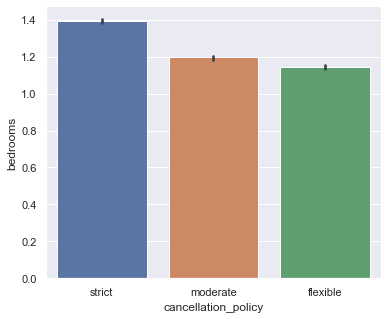

<IPython.core.display.Javascript object>

In [20]:
plt.figure(figsize=(6, 5))

sns.barplot(data=df, y="bedrooms", x="cancellation_policy")

plt.show()

- This graph indicates that rentals with more bedrooms have strict concellation policies. Further research would be needed to explain this behavior.
- There is a slight difference between moderate and flexible cancellation policy with rentals with more beds having more moderate policies than flexible ones.

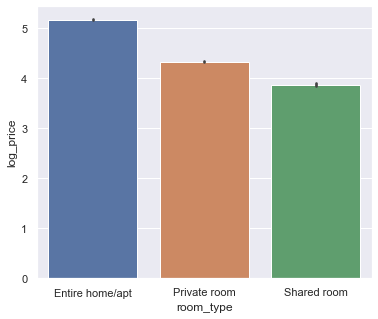

<IPython.core.display.Javascript object>

In [21]:
plt.figure(figsize=(6, 5))

sns.barplot(data=df, y="log_price", x="room_type")

plt.show()

- As one would likely assume, Entire home/apt has the highest log_price values, followed by Private room then Shared room.

#### Correlation between the columns

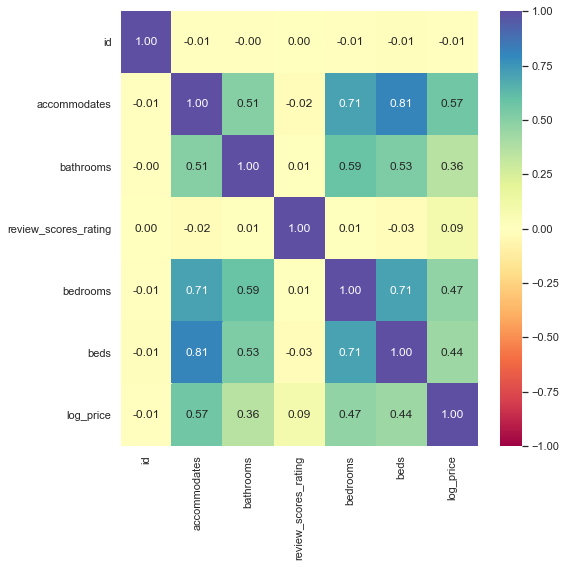

<IPython.core.display.Javascript object>

In [22]:
plt.figure(figsize=(8, 8))

sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")

plt.show()

- The heatmap reveals that other than review_scores_rating and id, the other columns have moderate to high positive correlation with other columns.
- For instance, accommodates has a strong correlation with log_price, beds, bedrooms and bathrooms.
- bedrooms too has a strong correlation with log_price, beds,bathroom and accommodates
- log_price has moderate correlation with beds, bedrooms, and bathrooms. Additionally, it has a strong correlation with accommodate.

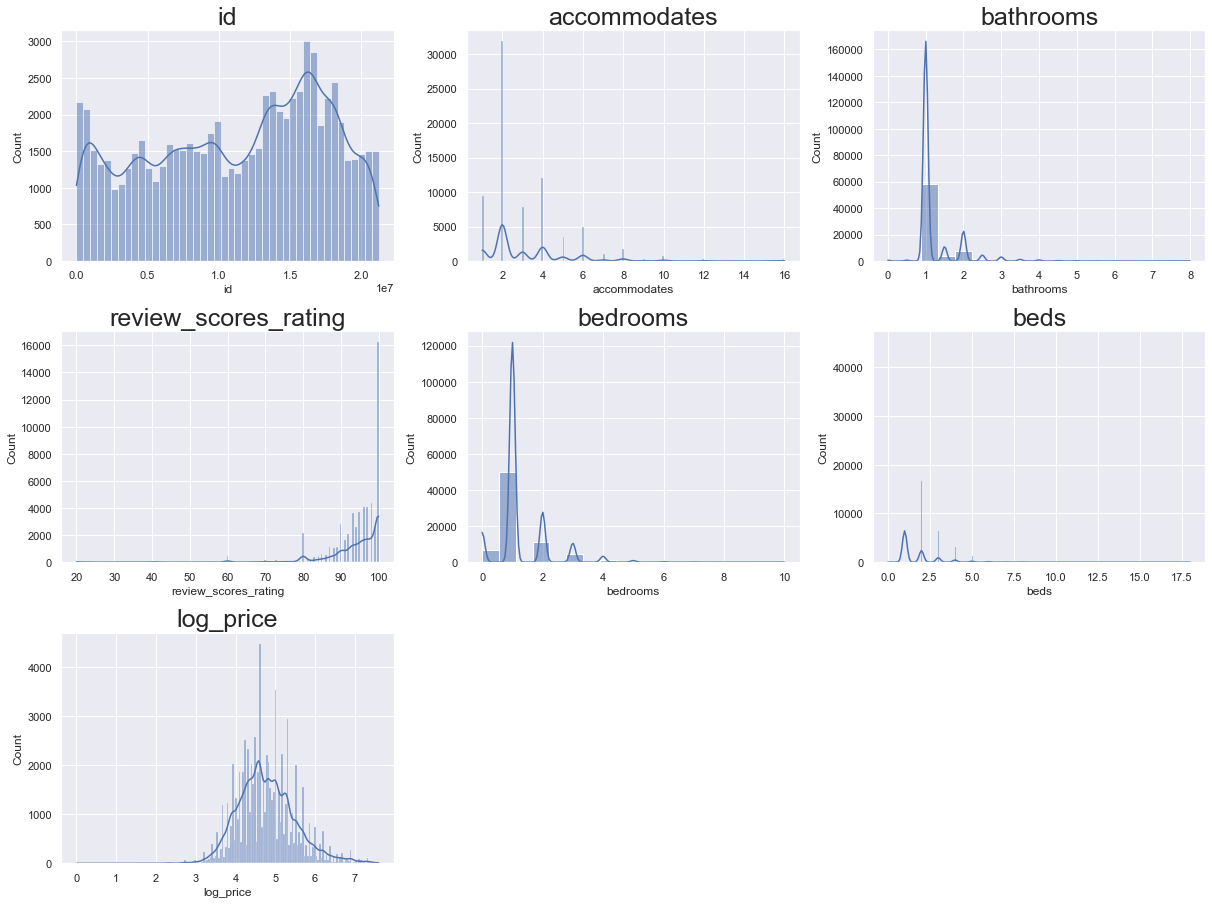

<IPython.core.display.Javascript object>

In [23]:
# lets plot distribution plot of all numerical variables

all_col = df.select_dtypes(include=np.number).columns.tolist()
# all_col.remove("id")
plt.figure(figsize=(17, 75))

for i in range(len(all_col)):
    plt.subplot(18, 3, i + 1)
    sns.histplot(df[all_col[i]], kde=True)
    plt.tight_layout()
    plt.title(all_col[i], fontsize=25)

plt.show()

- These plots serve to support some of the observations made in previous sections. The data in the columns is skewed, and there are outliers in the data. These are dealt with in the subsequent sections.
- It is also evident that 'id' might not have any useful information for the purposes of the current objective. Therefore, this column will be dropped in the subsequent section.

## Data pre-processing

visualize the data, then check if there's a pattern to the 0s

In [24]:
np.random.seed(2)  # to get the same sample all the time
df.sample(5)

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
55746,1811850,Private room,1.0,1.0,moderate,True,f,100.0,1.0,1.0,4.060443
73104,18449954,Entire home/apt,6.0,2.5,moderate,True,f,97.0,3.0,6.0,5.594711
71373,20404465,Entire home/apt,3.0,1.0,strict,True,f,98.0,1.0,1.0,4.997212
439,18476541,Private room,3.0,1.0,moderate,True,f,95.0,0.0,1.0,4.828314
7482,7483883,Entire home/apt,4.0,1.0,flexible,True,f,96.0,2.0,2.0,4.828314


<IPython.core.display.Javascript object>

**Dealing with the missing values**

In [25]:
df.drop(["id"], axis=1, inplace=True)

df.isna().sum()

room_type                   5
accommodates                3
bathrooms                 203
cancellation_policy         8
cleaning_fee                4
instant_bookable            0
review_scores_rating    16722
bedrooms                   92
beds                      131
log_price                   0
dtype: int64

<IPython.core.display.Javascript object>

- room_type, accommodates, bathrooms, cancellation_policy, cleaning_fee, bedrooms, beds each has less than 0.003 % of the entire column as missing values. Therefore, replacing the missing values with the mean for the numeric columns and most frequent variable for the categorical columns should hopefully not influence the data too much.
- review_scores_rating has ~23% missing values in that column. What will happen with this column will be determined further down in the analysis.

In [26]:
print(df["accommodates"].isnull().sum())
df["accommodates"].fillna(df["accommodates"].mean(), inplace=True)  # mean imputation
print(df["accommodates"].isnull().sum())
print("\n")

print(df["bathrooms"].isnull().sum())
df["bathrooms"].fillna(df["bathrooms"].mean(), inplace=True)  # mean imputation
print(df["bathrooms"].isnull().sum())
print("\n")

print(df["bedrooms"].isnull().sum())
df["bedrooms"].fillna(df["bedrooms"].mean(), inplace=True)
print(df["bedrooms"].isnull().sum())
print("\n")

print(df["beds"].isnull().sum())
df["beds"].fillna(df["beds"].mean(), inplace=True)
print(df["beds"].isnull().sum())
print("\n")

print(df["room_type"].isnull().sum())
df["room_type"].fillna(df["room_type"].value_counts().index[0], inplace=True)
print(df["room_type"].isnull().sum())
print("\n")

print(df["cancellation_policy"].isnull().sum())
df["cancellation_policy"].fillna(
    df["cancellation_policy"].value_counts().index[0], inplace=True
)
print(df["cancellation_policy"].isnull().sum())
print("\n")

print(df["cleaning_fee"].isnull().sum())
df["cleaning_fee"].fillna(df["cleaning_fee"].value_counts().index[0], inplace=True)
print(df["cleaning_fee"].isnull().sum())
print("\n")

3
0


203
0


92
0


131
0


5
0


8
0


4
0




<IPython.core.display.Javascript object>

In [27]:
df.isnull().sum()  # checking the remaining missing values

room_type                   0
accommodates                0
bathrooms                   0
cancellation_policy         0
cleaning_fee                0
instant_bookable            0
review_scores_rating    16722
bedrooms                    0
beds                        0
log_price                   0
dtype: int64

<IPython.core.display.Javascript object>

In [28]:
df.sample(6)

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
33339,Entire home/apt,12.0,4.5,strict,True,f,100.0,5.0,6.0,6.907755
18898,Private room,2.0,2.0,strict,True,f,NaN,1.0,1.0,4.605170
23286,Entire home/apt,2.0,1.0,flexible,True,t,91.0,1.0,1.0,4.564348
14677,Private room,2.0,1.0,moderate,False,f,NaN,1.0,1.0,4.787492
69105,Private room,1.0,1.0,flexible,False,f,87.0,1.0,1.0,4.430817
57112,Private room,1.0,1.0,moderate,False,f,96.0,1.0,1.0,4.127134


<IPython.core.display.Javascript object>

- An earlier DataFrame display revealed that there are some 0s in the columns. Next one can check if there is a pattern to the 0s.
- These 0s could also be handled during outlier treatment should the need for that be there.

In [29]:
# looking at value counts for numeric features

# num_to_display = 10  # defining this up here so it's easy to change later if I want
# for colname in df.dtypes[df.dtypes == "float"].index:
#     val_counts = df[colname].value_counts(dropna=False)  # i want to see NA counts
#     print(val_counts[:num_to_display])
#     if len(val_counts) > num_to_display:
#         print(f"Only displaying first {num_to_display} of {len(val_counts)} values.")
#     print("\n\n")  # just for more space between

<IPython.core.display.Javascript object>

In [30]:
df.accommodates.value_counts()

2.000000     31853
4.000000     12066
1.000000      9434
3.000000      7793
6.000000      4968
5.000000      3444
8.000000      1795
7.000000       946
10.000000      701
16.000000      301
9.000000       270
12.000000      264
14.000000      104
11.000000       79
15.000000       54
13.000000       36
3.155125         3
Name: accommodates, dtype: int64

<IPython.core.display.Javascript object>

In [31]:
df.bathrooms.value_counts()

1.000000    58096
2.000000     7936
1.500000     3801
2.500000     1567
3.000000     1066
3.500000      429
4.000000      286
0.500000      209
1.235272      203
0.000000      198
4.500000      116
5.000000       72
8.000000       41
5.500000       39
6.000000       24
6.500000       12
7.000000       10
7.500000        6
Name: bathrooms, dtype: int64

<IPython.core.display.Javascript object>

In [32]:
df.bedrooms.value_counts()

1.000000     49783
2.000000     11351
0.000000      6715
3.000000      4309
4.000000      1330
5.000000       355
6.000000       106
1.265797        92
7.000000        38
8.000000        14
10.000000       10
9.000000         8
Name: bedrooms, dtype: int64

<IPython.core.display.Javascript object>

In [33]:
df.beds.value_counts()

1.000000     45144
2.000000     16704
3.000000      6442
4.000000      3065
5.000000      1287
6.000000       661
7.000000       216
8.000000       186
1.710868       131
10.000000       88
9.000000        72
16.000000       38
12.000000       29
11.000000       23
13.000000       10
15.000000        6
14.000000        4
0.000000         4
18.000000        1
Name: beds, dtype: int64

<IPython.core.display.Javascript object>

In [34]:
df.log_price.value_counts()

5.010635    2729
4.605170    2707
4.317488    2049
5.298317    1923
3.912023    1920
            ... 
6.650279       1
6.274762       1
7.457609       1
6.456770       1
0.000000       1
Name: log_price, Length: 767, dtype: int64

<IPython.core.display.Javascript object>

- Indeed, bathrooms, bedrooms, beds, and log_price have 0s as values. 
- It is a little bit odd to have no bathrooms, bedrooms or beds associated with an AirBnB rental. Therefore, it is good to check if there is anything that can be noted about the 0s.

**1.Bathrooms**

In [35]:
df[df["bathrooms"] == 0]["room_type"].value_counts()

Private room       142
Entire home/apt     34
Shared room         22
Name: room_type, dtype: int64

<IPython.core.display.Javascript object>

In [36]:
df[df["bathrooms"] == 0]["cancellation_policy"].value_counts()

flexible    74
strict      68
moderate    56
Name: cancellation_policy, dtype: int64

<IPython.core.display.Javascript object>

In [37]:
df[df["bathrooms"] == 0]["cleaning_fee"].value_counts()

True     119
False     79
Name: cleaning_fee, dtype: int64

<IPython.core.display.Javascript object>

In [38]:
df[df["bathrooms"] == 0]["instant_bookable"].value_counts()

f    151
t     47
Name: instant_bookable, dtype: int64

<IPython.core.display.Javascript object>

- It looks noticeable that private rooms do not have bathrooms. Other than that, there is no pattern observed with the rentals with 0 bathrooms. This could be indicative of the facilities being available in a seperate building or something like that. 
- Additionally, the 0s account for less than 0.003% of the whole values in that column. Therefore, they will be not altered.

**2.Bedrooms**

In [39]:
df[df["bedrooms"] == 0]["room_type"].value_counts()

Entire home/apt    6284
Private room        431
Name: room_type, dtype: int64

<IPython.core.display.Javascript object>

In [40]:
df[df["bedrooms"] == 0]["cancellation_policy"].value_counts()

strict      2942
flexible    1971
moderate    1802
Name: cancellation_policy, dtype: int64

<IPython.core.display.Javascript object>

In [41]:
df[df["bedrooms"] == 0]["cleaning_fee"].value_counts()

True     5041
False    1674
Name: cleaning_fee, dtype: int64

<IPython.core.display.Javascript object>

In [42]:
df[df["bedrooms"] == 0]["instant_bookable"].value_counts()

f    4782
t    1933
Name: instant_bookable, dtype: int64

<IPython.core.display.Javascript object>

- It is intriguing that entire homes/apartments do not have bedrooms available. It is likely that this is a mistake, so the 0s can be replaced with the mean of that column.
- There is no observable pattern in the other columns.

In [43]:
# replacing the 0s with the column mean
df.bedrooms = df.bedrooms.apply(lambda x: df["bedrooms"].mean() if x == 0 else x)

<IPython.core.display.Javascript object>

In [44]:
df.bedrooms.value_counts()

1.000000     49783
2.000000     11351
1.265797      6715
3.000000      4309
4.000000      1330
5.000000       355
6.000000       106
1.265797        92
7.000000        38
8.000000        14
10.000000       10
9.000000         8
Name: bedrooms, dtype: int64

<IPython.core.display.Javascript object>

**3. Beds**

In [45]:
df[df["beds"] == 0]["room_type"].value_counts()

Entire home/apt    4
Name: room_type, dtype: int64

<IPython.core.display.Javascript object>

In [46]:
df[df["beds"] == 0]["cancellation_policy"].value_counts()

strict    4
Name: cancellation_policy, dtype: int64

<IPython.core.display.Javascript object>

In [47]:
df[df["beds"] == 0]["cleaning_fee"].value_counts()

True     2
False    2
Name: cleaning_fee, dtype: int64

<IPython.core.display.Javascript object>

In [48]:
df[df["beds"] == 0]["instant_bookable"].value_counts()

t    3
f    1
Name: instant_bookable, dtype: int64

<IPython.core.display.Javascript object>

- The 4 missing beds seem to all come from entire homes/apartments. It is possible that there are couches or pull-out beds available in those rentals. Sleeping bags and air mattresses could also be available in those location, therefore the 0s will be unaltered in this column.

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_type             74111 non-null  object 
 1   accommodates          74111 non-null  float64
 2   bathrooms             74111 non-null  float64
 3   cancellation_policy   74111 non-null  object 
 4   cleaning_fee          74111 non-null  bool   
 5   instant_bookable      74111 non-null  object 
 6   review_scores_rating  57389 non-null  float64
 7   bedrooms              74111 non-null  float64
 8   beds                  74111 non-null  float64
 9   log_price             74111 non-null  float64
dtypes: bool(1), float64(6), object(3)
memory usage: 5.2+ MB


<IPython.core.display.Javascript object>

### Outlier Treatment

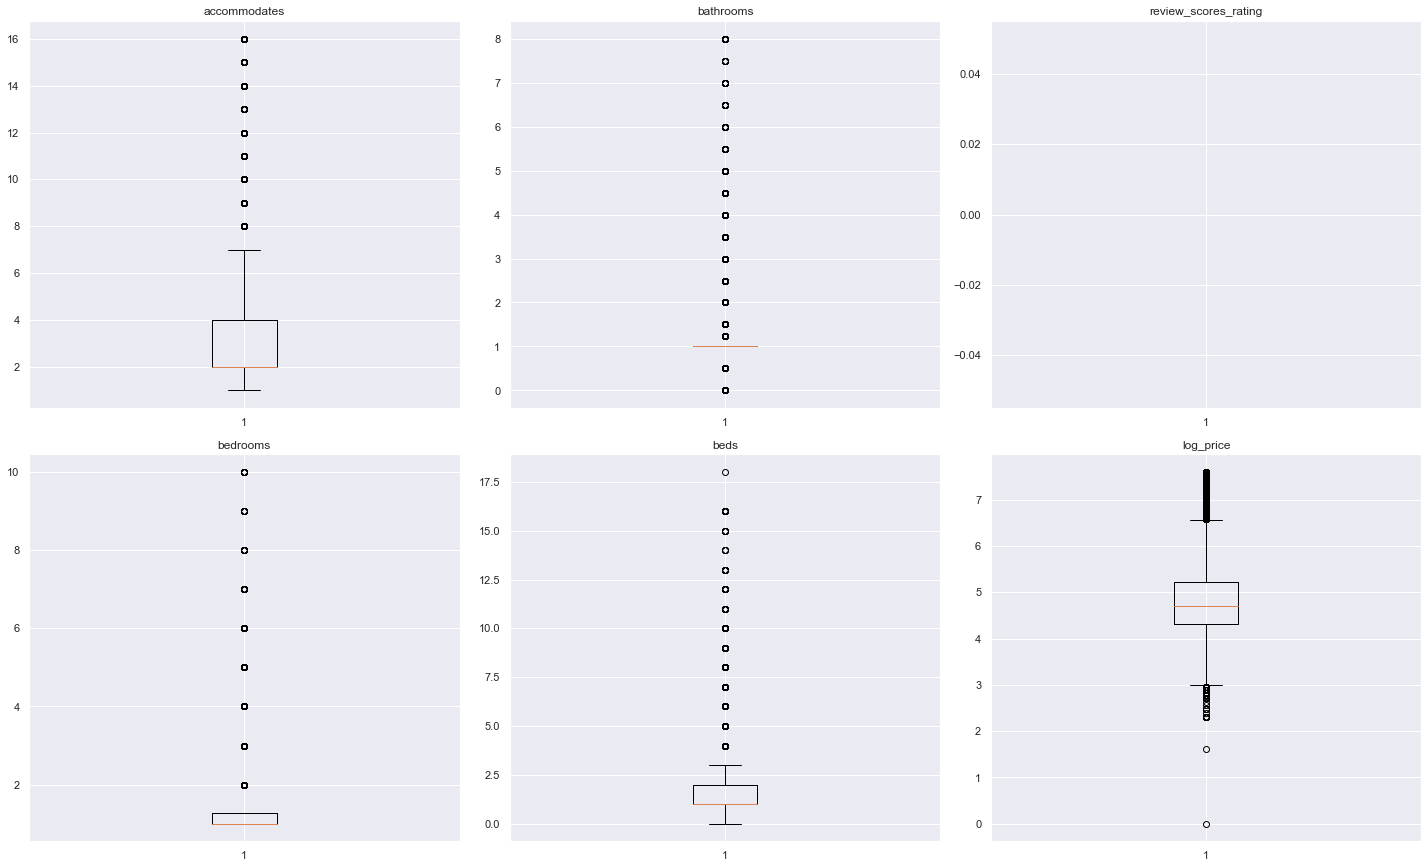

<IPython.core.display.Javascript object>

In [50]:
# let's plot the boxplots of all columns to check for outliers
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 3, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

The outliers are still present in the data in upper and lower limits for some of the columns. They will be removed for the purposes of the current analysis.

In [51]:
# Let's treat outliers by flooring and capping
def treat_outliers(df, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    treat outlier in all numerical variables
    col_list: list of numerical variables
    df: data frame
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

<IPython.core.display.Javascript object>

In [52]:
# numerical_col = df.select_dtypes(include=np.number).columns.tolist()
# df = treat_outliers_all(df, numerical_col)

# plt.figure(figsize=(20, 30))

# for i, variable in enumerate(numeric_columns):
#     plt.subplot(5, 4, i + 1)
#     plt.boxplot(df[variable], whis=1.5)
#     plt.tight_layout()
#     plt.title(variable)

# plt.show()

<IPython.core.display.Javascript object>

- Treating the outliers by capping the values falling below or above the IQR significantly altered the bathrooms columns which was left with all values being 1. Consequently, and as a result of the values in the data being plausible, the outliers will be left in the dataset.

In [53]:
df.bathrooms.value_counts()

1.000000    58096
2.000000     7936
1.500000     3801
2.500000     1567
3.000000     1066
3.500000      429
4.000000      286
0.500000      209
1.235272      203
0.000000      198
4.500000      116
5.000000       72
8.000000       41
5.500000       39
6.000000       24
6.500000       12
7.000000       10
7.500000        6
Name: bathrooms, dtype: int64

<IPython.core.display.Javascript object>

**Checking the current state of the data**

In [54]:
df.describe(include="all")

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
count,74111,74111.000000,74111.000000,74111,74111,74111,57389.000000,74111.000000,74111.000000,74111.000000
unique,3,NaN,NaN,3,2,2,NaN,NaN,NaN,NaN
top,Entire home/apt,NaN,NaN,strict,True,f,NaN,NaN,NaN,NaN
freq,41313,NaN,NaN,32508,54403,54660,NaN,NaN,NaN,NaN
mean,NaN,3.155125,1.235272,NaN,NaN,NaN,94.067365,1.380487,1.710868,4.782069
std,NaN,2.153559,0.581256,NaN,NaN,NaN,7.836556,0.752944,1.253033,0.717394
min,NaN,1.000000,0.000000,NaN,NaN,NaN,20.000000,1.000000,0.000000,0.000000
25%,NaN,2.000000,1.000000,NaN,NaN,NaN,92.000000,1.000000,1.000000,4.317488
50%,NaN,2.000000,1.000000,NaN,NaN,NaN,96.000000,1.000000,1.000000,4.709530
75%,NaN,4.000000,1.000000,NaN,NaN,NaN,100.000000,1.265797,2.000000,5.220356


<IPython.core.display.Javascript object>

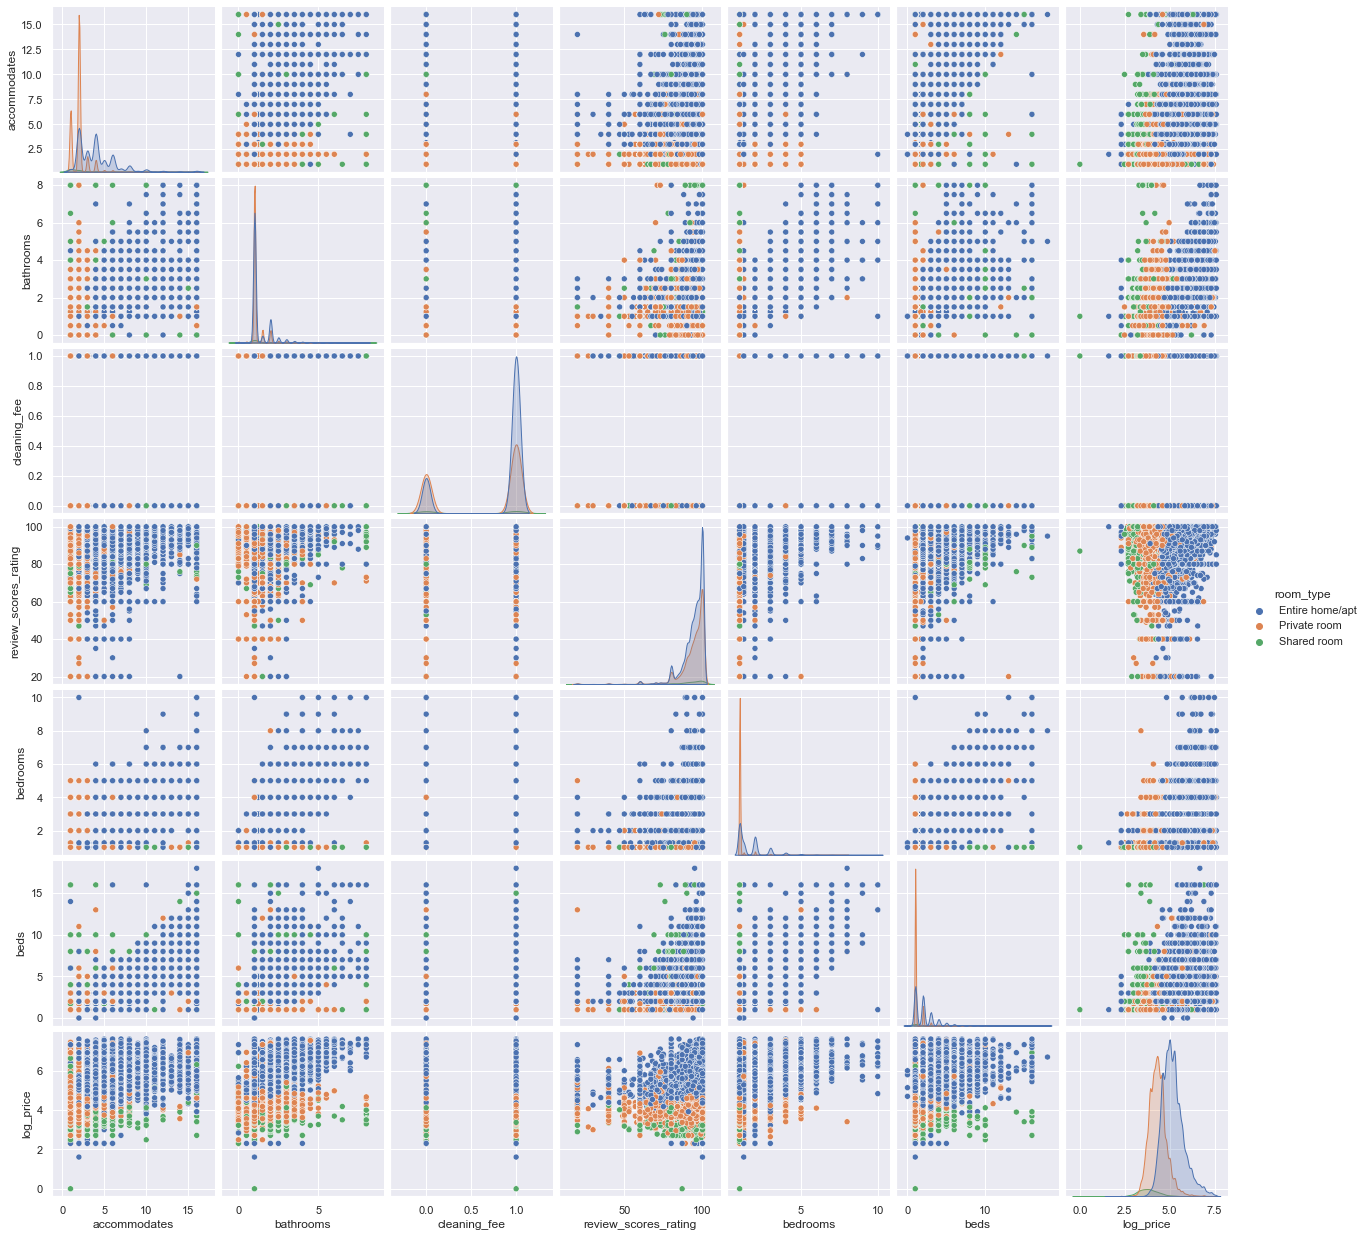

<IPython.core.display.Javascript object>

In [55]:
sns.pairplot(data=df, hue="room_type")

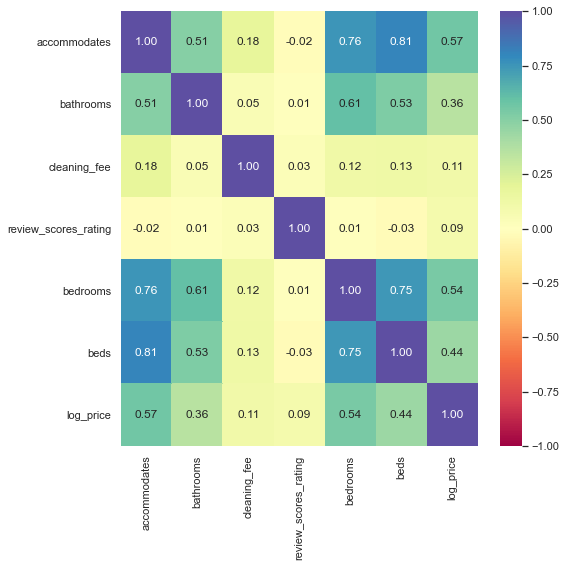

<IPython.core.display.Javascript object>

In [56]:
plt.figure(figsize=(8, 8))

sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")

plt.show()

- No significant change is observable in the correlations after dealing with the missing values and outliers. It appears the same columns have moderate to strong positive correlations. 

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_type             74111 non-null  object 
 1   accommodates          74111 non-null  float64
 2   bathrooms             74111 non-null  float64
 3   cancellation_policy   74111 non-null  object 
 4   cleaning_fee          74111 non-null  bool   
 5   instant_bookable      74111 non-null  object 
 6   review_scores_rating  57389 non-null  float64
 7   bedrooms              74111 non-null  float64
 8   beds                  74111 non-null  float64
 9   log_price             74111 non-null  float64
dtypes: bool(1), float64(6), object(3)
memory usage: 5.2+ MB


<IPython.core.display.Javascript object>

In [58]:
df.sample(3)

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
34114,Private room,4.0,1.0,flexible,False,f,NaN,1.000000,2.0,5.010635
65951,Entire home/apt,6.0,2.0,strict,True,t,NaN,3.000000,4.0,6.040255
8160,Entire home/apt,2.0,1.0,strict,True,f,93.0,1.265797,1.0,5.068904


<IPython.core.display.Javascript object>

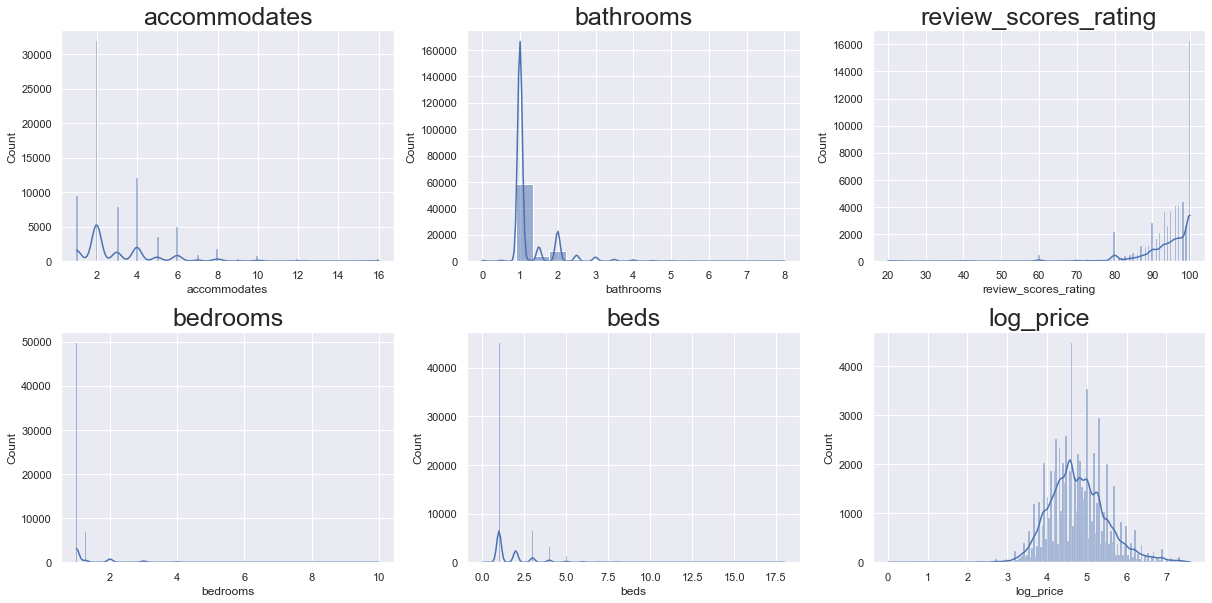

<IPython.core.display.Javascript object>

In [59]:
all_col = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(17, 75))

for i in range(len(all_col)):
    plt.subplot(18, 3, i + 1)
    sns.histplot(df[all_col[i]], kde=True)
    plt.tight_layout()
    plt.title(all_col[i], fontsize=25)

plt.show()

- The data is still skewed, apart from the **log_price** column which has a close to normal distribution. Assuming that the log_price column was transformed using the log function, the other columns will also be transformed using the log function for unanimity and to possibly help with the skewness.

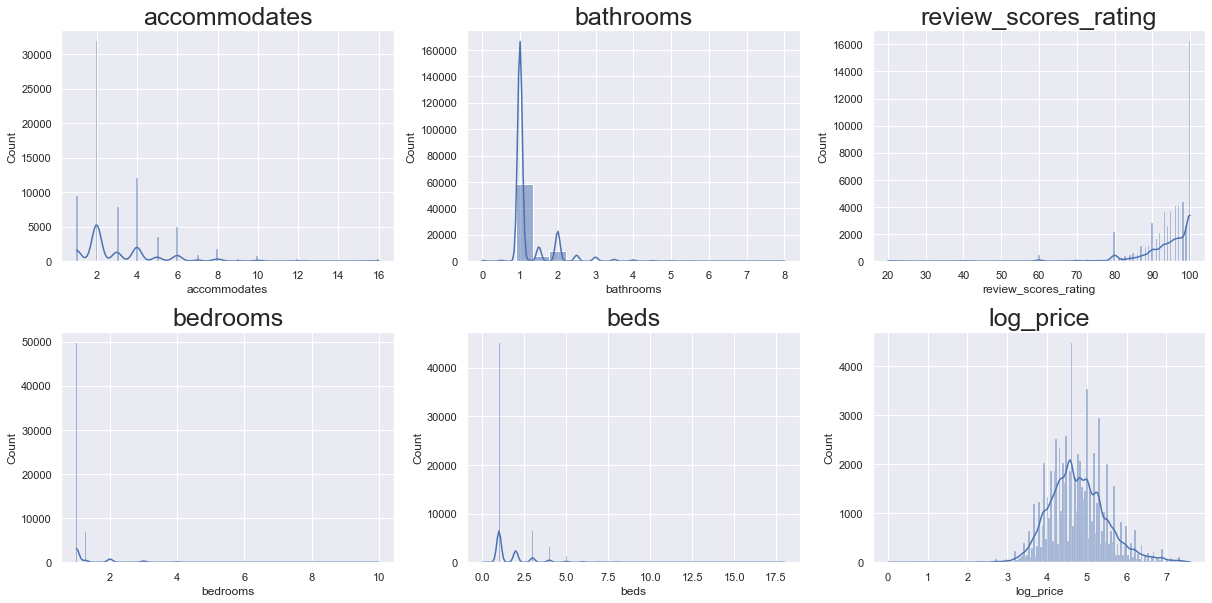

<IPython.core.display.Javascript object>

In [60]:
np.log(df["accommodates"])
np.log(df["bathrooms"])
np.log(df["review_scores_rating"])
np.log(df["bedrooms"])
np.log(df["beds"])

all_col = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(17, 75))

for i in range(len(all_col)):
    plt.subplot(18, 3, i + 1)
    sns.histplot(df[all_col[i]], kde=True)
    plt.tight_layout()
    plt.title(all_col[i], fontsize=25)

plt.show()

- Log transformation did not get rid of the skewness.
- The data will be left as is with regard to skewness.

In [61]:
df.sample(3)

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
20817,Entire home/apt,1.0,1.0,moderate,True,f,NaN,1.265797,1.0,4.382027
22371,Entire home/apt,2.0,1.0,moderate,True,f,99.0,1.265797,1.0,4.442651
50353,Entire home/apt,6.0,1.0,strict,True,f,91.0,2.000000,3.0,5.293305


<IPython.core.display.Javascript object>

## Preparing the data for modelling

- **review_scores_rating** is the only column left that has missing values(~16500). Based on the nature of the business, ratings play an important role in pricing, and customers choosing certain rental properties. Therefore, dropping the entire column could not reveal some key insights. 
- However, it is important to acknowledge that number of missing values in that column is not to be overlooked. Whatever action is taken because of the missing values signifiacntly affects the results. For the current analysis, only rows with values will be considered.

In [62]:
df2 = df[
    df["review_scores_rating"].notna()
]  # taking part of the dataframe where the ratings column is not empty
df2.isnull().sum()

room_type               0
accommodates            0
bathrooms               0
cancellation_policy     0
cleaning_fee            0
instant_bookable        0
review_scores_rating    0
bedrooms                0
beds                    0
log_price               0
dtype: int64

<IPython.core.display.Javascript object>

In [63]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57389 entries, 0 to 74110
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_type             57389 non-null  object 
 1   accommodates          57389 non-null  float64
 2   bathrooms             57389 non-null  float64
 3   cancellation_policy   57389 non-null  object 
 4   cleaning_fee          57389 non-null  bool   
 5   instant_bookable      57389 non-null  object 
 6   review_scores_rating  57389 non-null  float64
 7   bedrooms              57389 non-null  float64
 8   beds                  57389 non-null  float64
 9   log_price             57389 non-null  float64
dtypes: bool(1), float64(6), object(3)
memory usage: 4.4+ MB


<IPython.core.display.Javascript object>

#### Encoding categorical variables

In [64]:
df3 = pd.get_dummies(
    df2,
    columns=["room_type", "cancellation_policy", "cleaning_fee", "instant_bookable"],
    drop_first=True,
)

df3.head(2)

,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_True,instant_bookable_t
0,3.0,1.0,100.0,1.0,1.0,5.010635,0,0,0,1,1,0
1,7.0,1.0,93.0,3.0,3.0,5.129899,0,0,0,1,1,1


<IPython.core.display.Javascript object>

### Linear Regression Model building

In [65]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

y = df3[["log_price"]]
x = df3.drop(["log_price"], axis=1)
x = sm.add_constant(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

linear_regression = sm.OLS(y_train, x_train)
lin_regm = linear_regression.fit()

print(lin_regm.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     4652.
Date:                Wed, 30 Jun 2021   Prob (F-statistic):               0.00
Time:                        17:29:14   Log-Likelihood:                -24358.
No. Observations:               40172   AIC:                         4.874e+04
Df Residuals:                   40160   BIC:                         4.884e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

<IPython.core.display.Javascript object>

- Negative values in the coefficient column indicate the the log price decreases with an increase in the corresponding attribute value. Positive values indicate that an increase in the log price corresponds with an increase in the corresponding attribute value.
- This analysis works with a significance level of 0.05. Therefore, under the p-value column, any variable with a p-value less than 0.05 is considered to be significant.
- However, as the model summary warns, the variables might contain multicollinearity, which affects the p-value. This issue has to be dealt with, in addition to checking whether the assumptions of the linear regression have been met.

### Checking model performance

In [66]:
import math
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
)  # To check model performance


# defining function for MAPE
def mape(targets, predictions):
    return np.mean(np.abs((targets - predictions)) / targets) * 100


# defining common function for all metrics
def model_perform(model, inp, out):
    """
    model: model
    inp: independent variables
    out: dependent variable
    """
    y_pred = model.predict(inp).flatten()
    y_act = out.values.flatten()

    return pd.DataFrame(
        {
            "MAE": mean_absolute_error(y_act, y_pred),
            "MAPE": mape(y_act, y_pred),
            "RMSE": np.sqrt(mean_squared_error(y_act, y_pred)),
            "R^2": r2_score(y_act, y_pred),
        },
        index=[0],
    )




<IPython.core.display.Javascript object>

In [67]:
from sklearn.linear_model import LinearRegression

linearregression = LinearRegression()
linearregression.fit(x_train, y_train)

LinearRegression()

<IPython.core.display.Javascript object>

In [68]:
model_perform(linearregression, x_train, y_train)

,MAE,MAPE,RMSE,R^2
0,0.344318,inf,0.443703,0.560289


<IPython.core.display.Javascript object>

In [69]:
model_perform(linearregression, x_test, y_test)

,MAE,MAPE,RMSE,R^2
0,0.343595,7.365823,0.440469,0.564788


<IPython.core.display.Javascript object>

- The training and testing R-Squared scores are ~56% and are therefore comparable. This is an indication that the model is a good fit.
- However, the R-Squared on the test set is 0.5647... that means that the model explains 56.5% of the total variation in the test dataset. This indicates that the model is unsatisfactory.
- The test set MAPE suggests that one can predict within 7.4% of the log price.
- The MAE indicates that the current model is able to predict log price within a mean error of 0.34

### Checking Linear Regression Assumptions

The assumptions are:-
- No multicollinearity
- Mean of residuals should be 0
- No heteroscedasticity
- Linearity of variables
- Normality of error terms.

#### Testing for multicollinearity
* Multicollinearity occurs when predictor variables in a regression model are correlated. This correlation is a problem because predictor variables should be independent. If the correlation between variables is high, it can cause problems when we fit the model and interpret the results. When we have multicollinearity the linear model, The coefficients that the model suggests are unreliable.

* There are different ways of detecting (or testing) multicollinearity. One such way is by using Variation Inflation Factor.

* **Variance  Inflation  factor**:  Variance inflation factors measure the inflation in the variances of the regression parameter estimates due to collinearities that exist among the  predictors.  It  is  a  measure  of  how  much  the  variance  of  the  estimated  regression coefficient $\beta_k$ is "inflated" by  the  existence  of  correlation  among  the  predictor variables in the model. 

* **General Rule of thumb**: If VIF is 1 then there is no correlation among the $k$th predictor and the remaining predictor variables, and  hence, the variance of $\beta_k$ is not inflated at all. Whereas, if VIF exceeds 5 or is close to exceeding 5, we say there is moderate multicollinearity, and if it is 10 or exceeding 10, it shows signs of high multicollinearity.

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(x.values, i) for i in range(x.shape[1])], index=x.columns
)
print("VIF Scores: \n\n{}\n".format(vif_series1))

VIF Scores: 

const                           161.440371
accommodates                      4.171355
bathrooms                         1.628865
review_scores_rating              1.015127
bedrooms                          3.141203
beds                              3.594203
room_type_Private room            1.389516
room_type_Shared room             1.113471
cancellation_policy_moderate      1.695327
cancellation_policy_strict        1.799007
cleaning_fee_True                 1.126849
instant_bookable_t                1.017414
dtype: float64



<IPython.core.display.Javascript object>

- The VIF results show that the variance of the log price and the other variables is not inflated. Therefore, there is no multicollinearity
- The earlier model summary revealed that only one of the variable, **cleaning_fee** is approaching significance. That variable will therefore be dropped to see how the model performs. All the other variables are significant.

In [71]:
x_train2 = x_train.drop(["cleaning_fee_True"], axis=1)

<IPython.core.display.Javascript object>

In [72]:
linear_regression2 = sm.OLS(y_train, x_train2)
lin_regm2 = linear_regression.fit()

print(lin_regm2.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     4652.
Date:                Wed, 30 Jun 2021   Prob (F-statistic):               0.00
Time:                        17:29:15   Log-Likelihood:                -24358.
No. Observations:               40172   AIC:                         4.874e+04
Df Residuals:                   40160   BIC:                         4.884e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

<IPython.core.display.Javascript object>

In [73]:
linearregression2 = LinearRegression()
linearregression2.fit(x_train2, y_train)

LinearRegression()

<IPython.core.display.Javascript object>

In [74]:
model_perform(linearregression2, x_train2, y_train)

,MAE,MAPE,RMSE,R^2
0,0.344337,inf,0.44372,0.560255


<IPython.core.display.Javascript object>

- The model perform is still very similar. There is no multicollinearity in the model. However, we will continue using the second model for the current analysis.

#### Assumption 2: Mean of residuals should be 0

In [75]:
residual = lin_regm2.resid

np.mean(residual)

-1.1368537850186844e-15

<IPython.core.display.Javascript object>

- The mean is very close to 0. The model satisfies the assumption.

#### Assumption 3: Linearity of varibles

**Why the test?**
* Linearity describes a straight-line relationship between two variables, predictor variables must have a linear relation with the dependent variable.

**How to check linearity?**

* Make a plot of fitted values vs residuals, if they don't follow any pattern, they we say the model is linear, otherwise model is showing signs of non-linearity.

**How to fix if this assumption is not followed?**

* We can try to transform the variables and make the relationships linear.

In [76]:
# residuals are already defined.
fitted = lin_regm2.fittedvalues  # aka predicted values

<IPython.core.display.Javascript object>

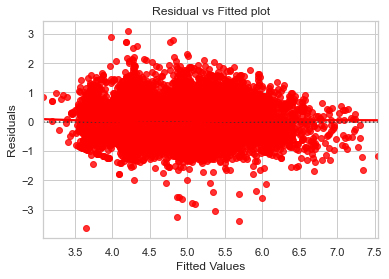

<IPython.core.display.Javascript object>

In [77]:
sns.set_style("whitegrid")
sns.residplot(fitted, residual, color="red", lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual vs Fitted plot")
plt.show()

* If there exist any pattern in this plot, we consider it as signs of non-linearity in the data and a pattern means that the model doesn't capture non-linear effects.

* **We see no pattern in the plot above. Hence, the assumption is satisfied.**


#### Assumption 4: Test for normality

**What is the test?**

* Error terms/Residuals should be normally distributed

* If the error terms are non- normally distributed, confidence intervals may become too wide or narrow. Once confidence interval becomes unstable, it leads to difficulty in estimating coefficients based on minimization of least squares.

**What do non-normality indicate?**

* It suggests that there are a few unusual data points which must be studied closely to make a better model.

**How to Check the Normality?**

* It can be checked via QQ Plot, Residuals following normal distribution will make a straight line plot otherwise not.

* Other test to check for normality : Shapiro-Wilk test.

**What if the residuals are not-normal?**

* We can apply transformations like log, exponential, arcsinh, etc. as per our data. Log transformation is already applied in the current data

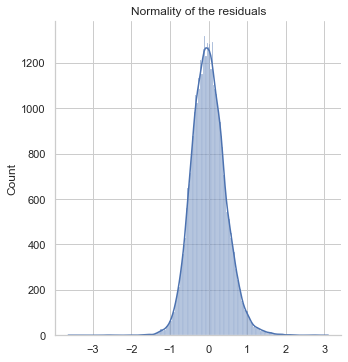

<IPython.core.display.Javascript object>

In [78]:
sns.displot(residual, kde=True)
plt.title("Normality of the residuals")
plt.show()

- The residuals appear to be normaly distributed. One can also check/confirm that statement by plotting a probality plot for the residuals as shown below. Normaly distributed residuals should follow a straight line.

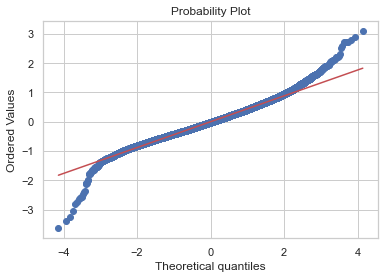

<IPython.core.display.Javascript object>

In [79]:
import pylab
import scipy.stats as stats

stats.probplot(residual, dist="norm", plot=pylab)
plt.show()

- The probplot shows that there are data points divert from normal distributions. This could be attributed to the outliers left in the data. 
- Therefore, we will stick with the QQ plot for the purposes of the current analysis.

#### Assumption 5: Test for Homoscedasticity

* Test - goldfeldquandt test

* **Homoscedacity**: If the variance of the residuals are symmetrically distributed across the regression line, then the data is said to homoscedastic.

* **Heteroscedacity**: If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic. In this case the residuals can form an arrow shape or any other non symmetrical shape.

For goldfeldquandt test, the null and alternate hypotheses are as follows:

- Null hypothesis : Residuals are homoscedastic
- Alternate hypothesis : Residuals have heteroscedasticity

In [80]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(residual, x_train2)
lzip(name, test)

[('F statistic', 1.012143552215974), ('p-value', 0.19624996565188046)]

<IPython.core.display.Javascript object>

- Since the p-value is greater than 0.05, we fail to reject the null hypothesis and conclude that the residuals are homoscedastic. The assumption is, therefore, valid for the current data.

In [81]:
model_perform(linearregression2, x_train2.values, y_train)

,MAE,MAPE,RMSE,R^2
0,0.344337,inf,0.44372,0.560255


<IPython.core.display.Javascript object>

In [82]:
x_test_final = x_test[x_train2.columns]

model_perform(linearregression2, x_test_final.values, y_test)

,MAE,MAPE,RMSE,R^2
0,0.343624,7.366788,0.440453,0.56482


<IPython.core.display.Javascript object>

### Conclusions

In [83]:
print(lin_regm2.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     4652.
Date:                Wed, 30 Jun 2021   Prob (F-statistic):               0.00
Time:                        17:30:30   Log-Likelihood:                -24358.
No. Observations:               40172   AIC:                         4.874e+04
Df Residuals:                   40160   BIC:                         4.884e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

<IPython.core.display.Javascript object>

- Despite the models poor scores, some interpretations can still be made.
- All the available variables are very significant. For instance, for variables with a positive coefficient such as **accommodates, bathrooms, review scores rating, bedrooms, cancellation policy (strict & moderate) and cleaning fee(True)**, an increase in those variables corresponds with an increase in the log price.
- For the variables with a negative coefficient such as **beds, room type(private and shared rooms), and instant bookable**, an increase in those variables indicates a decrease in the log price.
- As an illustration, an increase in 1 unit of bathrooms corresponds to a 0.12 increase in the log_price.
- Additionally, an increase in 1 unit of shared room room type corresponds to a 1.1 decrease in the log_price. Closely related to that, an increase in 1 unit of private room room type corresponds to a 0.58 decrease in log_price.
- Shared rooms and private rooms might be not be attractive options for customers, which could be attributed to the lack of complete privacy. AirBnB and people interested in putting their property up on the AirBnB database should invest more in entire homes/apartments.
- AirBnB and its renters could also work to ensure that there are more bedrooms available because an increase in the bedrooms corresponds to an increase in the log_price.
